In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import re

In [3]:
from __future__ import print_function

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
def reorder_matrix(ndarr):
    if ndarr.shape != (11, 11):
        return np.array([0], dtype=np.float)
    mid_arr = np.zeros((11, 11), dtype=np.float)
    new_arr = np.zeros((11, 11), dtype=np.float)
    mid_arr[0, :] = ndarr[0, :]
    mid_arr[1, :] = ndarr[1, :]
    mid_arr[2, :] = ndarr[6, :]
    mid_arr[3, :] = ndarr[2, :]
    mid_arr[4, :] = ndarr[7, :]
    mid_arr[5, :] = ndarr[3, :]
    mid_arr[6, :] = ndarr[8, :]
    mid_arr[7, :] = ndarr[4, :]
    mid_arr[8, :] = ndarr[9, :]
    mid_arr[9, :] = ndarr[5, :]
    mid_arr[10, :] = ndarr[10, :]
    new_arr[:, 0] = mid_arr[:, 0]
    new_arr[:, 1] = mid_arr[:, 1]
    new_arr[:, 2] = mid_arr[:, 6]
    new_arr[:, 3] = mid_arr[:, 2]
    new_arr[:, 4] = mid_arr[:, 7]
    new_arr[:, 5] = mid_arr[:, 3]
    new_arr[:, 6] = mid_arr[:, 8]
    new_arr[:, 7] = mid_arr[:, 4]
    new_arr[:, 8] = mid_arr[:, 9]
    new_arr[:, 9] = mid_arr[:, 5]
    new_arr[:, 10] = mid_arr[:, 10]
    return new_arr

In [7]:
def make_plots_and_reports(arr, plot_type, write_file=True):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(22,12))
    gs = plt.GridSpec(1, 3)

    # purity calc
    pur_arr = np.zeros_like(arr)
    pur_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[i, :]
        ntotal = arr.sum(axis=1)[i]
        epsilon = npass / ntotal
        pur_arr[i, :] = epsilon
        pur_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
    
    # effic. calc
    eff_arr = np.zeros_like(arr)
    eff_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[:, i]
        ntotal = arr.sum(axis=0)[i]
        epsilon = npass / ntotal
        eff_arr[:, i] = epsilon
        eff_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
    
    plot_title_string = re.sub(r'_', r' ', plot_type)
    plot_title_string = re.sub(r'\+', r', ', plot_title_string)
    
    # raw event counts plots
    ax = plt.subplot(gs[0])
    im = ax.imshow(np.log10(arr), cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title(r'Log$_{10}$' + ' of raw event counts\n' + plot_title_string)
    plt.xlabel(r'True z-segment')
    plt.ylabel(r'Reconstructed z-segment')
        
    # purity plots & reports
    if write_file:
        output_txt = 'normalized_by_row_confusion_matrix_%s.txt' % plot_type
        with open(output_txt, 'w') as f:
            for i in range(pur_arr.shape[0]):
                print('segment {:2d}: purity = {}'.format(i, pur_arr[i, i]))
                print('segment {:2d}: purity = {}'.format(i, pur_arr[i, i]), file=f)
    ax = plt.subplot(gs[1])
    im = ax.imshow(pur_arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title('Purity (row normalized)\n{}'.format(plot_title_string))
    plt.xlabel('True z-segment')
    plt.ylabel('Reconstructed z-segment')

    # efficiency plots & reports
    if write_file:
        output_txt = 'normalized_by_col_confusion_matrix_%s.txt' % plot_type
        with open(output_txt, 'w') as f:
            for i in range(eff_arr.shape[0]):
                print('segment {:2d}: efficiency = {}'.format(i, eff_arr[i, i]))
                print('segment {:2d}: efficiency = {}'.format(i, eff_arr[i, i]), file=f)
    ax = plt.subplot(gs[2])
    im = ax.imshow(eff_arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title('Efficiency (column normalized)\n{}'.format(plot_title_string))
    plt.xlabel('True z-segment')
    plt.ylabel('Reconstructed z-segment')

    fig.savefig('confusion_matrices_{}.pdf'.format(plot_type), bbox_inches='tight')
    
    # all log...
    fig = plt.figure(figsize=(22,12))
    gs = plt.GridSpec(1, 3)
    
    # raw event counts plots
    ax = plt.subplot(gs[0])
    im = ax.imshow(np.log10(arr), cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title(r'Log$_{10}$' + ' of raw event counts\n' + plot_title_string)
    plt.xlabel(r'True z-segment')
    plt.ylabel(r'Reconstructed z-segment')
        
    # purity plots
    ax = plt.subplot(gs[1])
    im = ax.imshow(np.log10(pur_arr * 100.0), cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title(r'Log$_{10}$' + ' Purity (row normalized)\n{}'.format(plot_title_string))
    plt.xlabel(r'True z-segment')
    plt.ylabel(r'Reconstructed z-segment')

    # efficiency plots
    ax = plt.subplot(gs[2])
    im = ax.imshow(np.log10(eff_arr * 100.0), cmap=plt.get_cmap('jet'), interpolation='nearest')
    cbar = plt.colorbar(im, fraction=0.04)
    plt.title(r'Log$_{10}$' + ' Efficiency (column normalized)\n{}'.format(plot_title_string))
    plt.xlabel(r'True z-segment')
    plt.ylabel(r'Reconstructed z-segment')

    fig.savefig('confusion_matrices_{}_alllog.pdf'.format(plot_type), bbox_inches='tight')
    
    return pur_arr, pur_arr_err, eff_arr, eff_arr_err

(11, 11)
segment  0: purity = 0.75
segment  1: purity = 0.977272727273
segment  2: purity = 0.904761904762
segment  3: purity = 0.969696969697
segment  4: purity = 0.833333333333
segment  5: purity = 0.945945945946
segment  6: purity = 0.903846153846
segment  7: purity = 0.928571428571
segment  8: purity = 0.0
segment  9: purity = 0.947368421053
segment 10: purity = 0.997218358832
segment  0: efficiency = 0.857142857143

/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide
/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: RuntimeWarning: divide by zero encountered in log10
/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: RuntimeWarning: divide by zero encountered in log10
/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in log10



segment  1: efficiency = 0.934782608696
segment  2: efficiency = 0.95
segment  3: efficiency = 0.888888888889
segment  4: efficiency = 0.9375
segment  5: efficiency = 0.945945945946
segment  6: efficiency = 0.94
segment  7: efficiency = 0.896551724138
segment  8: efficiency = nan
segment  9: efficiency = 0.923076923077
segment 10: efficiency = 0.995833333333


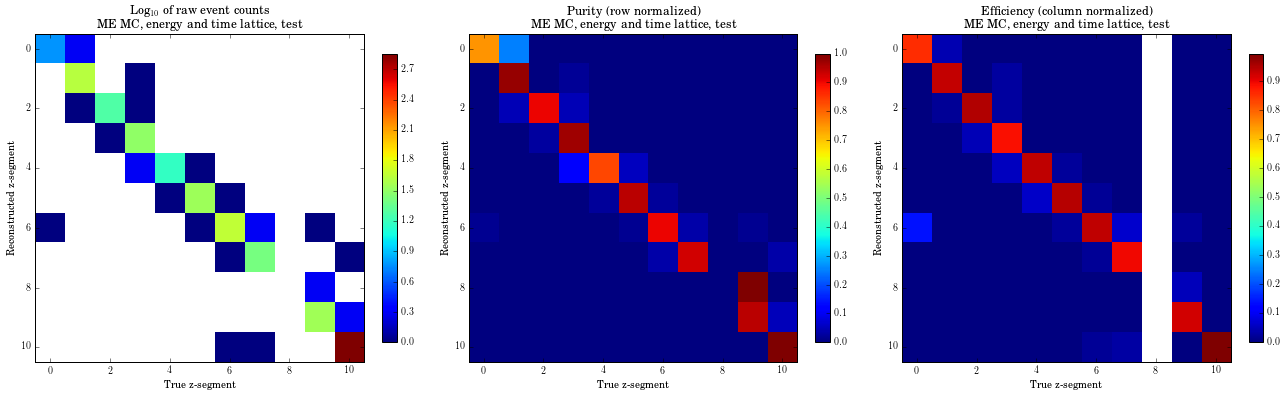

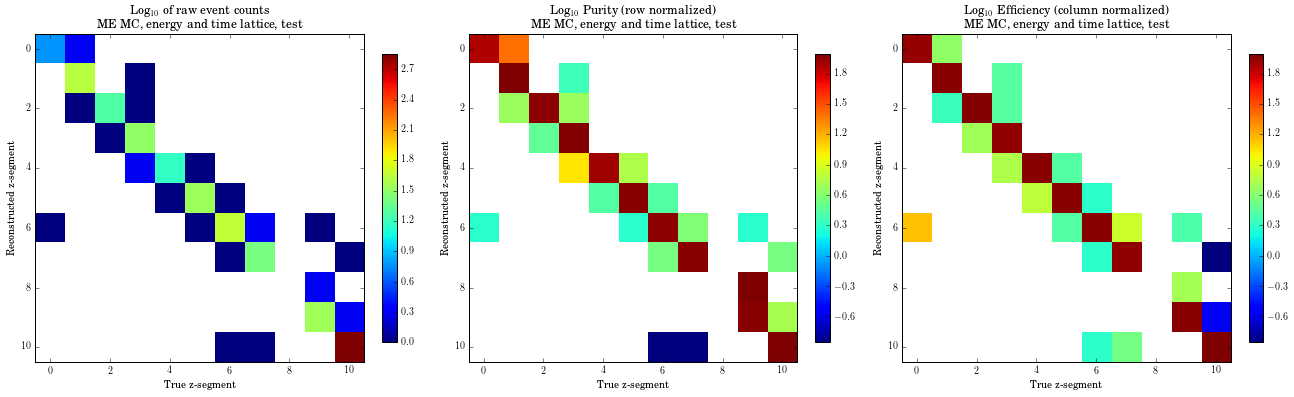

In [8]:
arr = np.load('perfmat11.npy')
#plot_type = 'ME_MC+energy_and_time_lattice+35_epochs'
plot_type = 'ME_MC+energy_and_time_lattice+test'


print(arr.shape)
if arr.shape[0] == 11:
    arr = reorder_matrix(arr)

pur_arr, pur_arr_err, eff_arr, eff_arr_err = make_plots_and_reports(arr, plot_type)